In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import os
print(os.listdir("bancos"))

['AQI By State 1980-2022.csv', 'international-airline-passengers.csv', 'testset.csv', 'trainset.csv']


### Preprocessing

Load and preprocess the data to create the training and test sets

In [2]:
dataset_train = pd.read_csv('bancos/trainset.csv')
dataset_test = pd.read_csv('bancos/testset.csv')

dataset_train.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


Convert the column to be analyzed into an array

In [3]:
timesteps = 50

train = dataset_train.loc[:, ['Open']].values 
real_stock_price = dataset_test.loc[:, ['Open']].values

dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)

Normalize data between 0 and 1

In [4]:
from sklearn.preprocessing import MinMaxScaler #bununla, 0-1 arasına scale ettik
scaler = MinMaxScaler(feature_range = (0, 1))
train_scaled = scaler.fit_transform(train)

test_scaled = dataset_total[len(dataset_total)-len(dataset_test) - timesteps:].values.reshape(-1,1)
inputs = scaler.transform(test_scaled) #minmax scaler


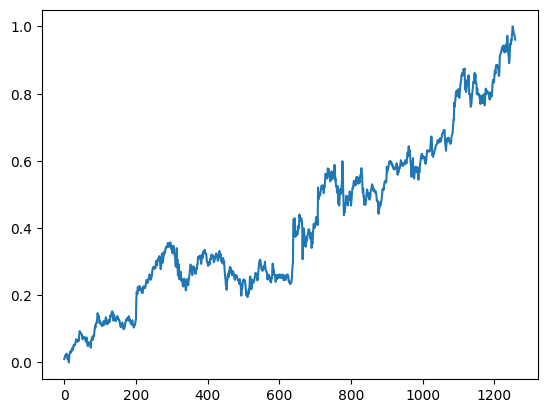

In [5]:
plt.plot(train_scaled)

Create Data Structure: 
Train and Test

In [6]:
X_train = []
y_train = []


for i in range(timesteps, 1250):
    X_train.append(train_scaled[i - timesteps:i, 0])
    y_train.append(train_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

X_test = []
for i in range(timesteps, 70):
    X_test.append(inputs[i-timesteps:i,0])
X_test = np.array(X_test)


In [7]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(X_train.shape)
print(X_test.shape)

(1200, 50, 1)
(20, 50, 1)


Create RNN Model

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

In [9]:
regressor = Sequential()

#Initialize RNN:
regressor = Sequential()

#Adding the first RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True, input_shape= (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

#Adding the second RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))

#Adding the third RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))

#Adding the fourth RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

#Adding the output layer
regressor.add(Dense(units = 1))

#Compile the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

#Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs=100, batch_size=32)



Epoch 1/100

38/38 [==============================] - 8s 54ms/step - loss: 0.4173
Epoch 2/100
38/38 [==============================] - 2s 48ms/step - loss: 0.2252
Epoch 3/100
38/38 [==============================] - 2s 51ms/step - loss: 0.1842
Epoch 4/100
38/38 [==============================] - 2s 46ms/step - loss: 0.1544
Epoch 5/100
38/38 [==============================] - 2s 44ms/step - loss: 0.1095
Epoch 6/100
38/38 [==============================] - 2s 40ms/step - loss: 0.0890
Epoch 7/100
38/38 [==============================] - 2s 44ms/step - loss: 0.0739
Epoch 8/100
38/38 [==============================] - 2s 42ms/step - loss: 0.0585
Epoch 9/100
38/38 [==============================] - 2s 43ms/step - loss: 0.0529
Epoch 10/100
38/38 [==============================] - 1s 35ms/step - loss: 0.0457
Epoch 11/100
38/38 [==============================] - 1s 32ms/step - loss: 0.0409
Epoch 12/100
38/38 [==============================] - 1s 36ms/step - loss: 0.0356
Epoch 13/100
38/38 [==

Prediction and Visualization of RNN Model

In [10]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

1/1 [==============================] - 1s 671ms/step


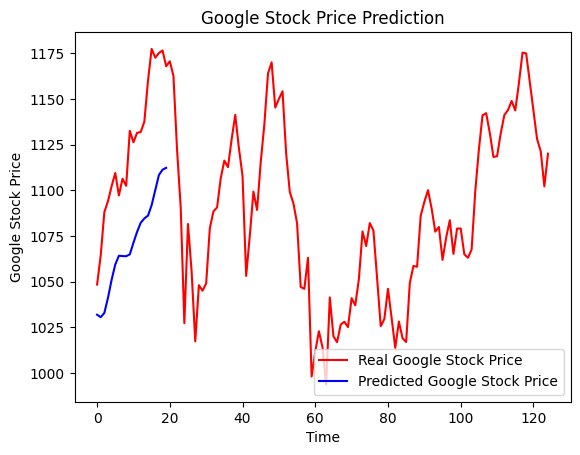

In [11]:
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

### Implementing LSTM with KERAS

Loading Data

In [12]:
data = pd.read_csv('bancos/international-airline-passengers.csv')
# dataset_train = pd.read_csv('bancos/AQI By State 1980-2022.csv')
data.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


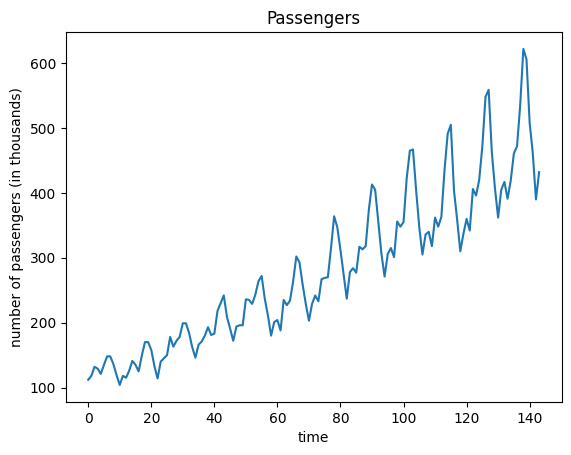

In [13]:
dataset = data.iloc[:, 1].values
plt.plot(dataset)
plt.xlabel('time')
plt.ylabel('number of passengers (in thousands)')
plt.title('Passengers')
plt.show()

Preprocess the data preserve column data

In [14]:
dataset = dataset.reshape(-1,1) 
dataset = dataset.astype('float32')
dataset.shape

(145, 1)

Normalize data between 0 and 1

In [15]:
scaler = MinMaxScaler(feature_range= (0,1))
dataset = scaler.fit_transform(dataset)

Create Data Structure: 
Train and Test

In [16]:
train_size = int(len(dataset)*0.5)
test_size = len(dataset) - train_size

train = dataset[0:train_size, :]
test = dataset[train_size:len(dataset), :]

print('train size: {}, test size: {}'.format(len(train), len(test)))

train size: 72, test size: 73


In [17]:
dataX = []
datay = []
timestemp = 10

for i in range(len(train)- timestemp - 1):
    a = train[i:(i+timestemp), 0]
    dataX.append(a)
    datay.append(train[i + timestemp, 0])

    
trainX, trainy = np.array(dataX), np.array(datay)
dataX = []
datay = []
for i in range(len(test)- timestemp -1):
    a = test[i:(i+timestemp), 0]
    dataX.append(a)
    datay.append(test[i + timestemp, 0])

    
testX, testy = np.array(dataX), np.array(datay)

In [18]:
trainX = np.reshape(trainX, (trainX.shape[0], 1,  trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1,  testX.shape[1]))

print(trainX.shape)
print(testX.shape)

(61, 1, 10)
(62, 1, 10)


### Create LSTM Model

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [20]:
model = Sequential()
model.add(LSTM(10, input_shape=(1, timestemp))) # 10 lstm neuron(block)
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainy, epochs=50, batch_size=1)

Epoch 1/50
61/61 [==============================] - 2s 2ms/step - loss: 0.0107
Epoch 2/50
61/61 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 3/50
61/61 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 4/50
61/61 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 5/50
61/61 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 6/50
61/61 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 7/50
61/61 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 8/50
61/61 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 9/50
61/61 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 10/50
61/61 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 11/50
61/61 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 12/50
61/61 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 13/50
61/61 [==============================

### Prediction

In [21]:
#make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainy = scaler.inverse_transform([trainy])
testPredict = scaler.inverse_transform(testPredict)
testy = scaler.inverse_transform([testy])

import math
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainy[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testy[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

2/2 [==============================] - 0s 0s/step
Train Score: 16.08 RMSE
Test Score: 54.79 RMSE


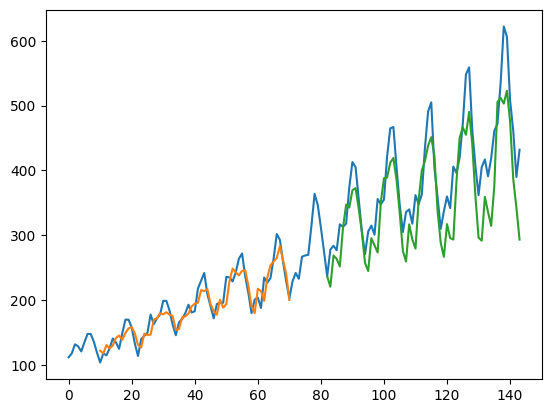

In [22]:
# shifting train
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[timestemp:len(trainPredict)+timestemp, :] = trainPredict
# shifting test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(timestemp*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()